# Medical Cost Personal Insurance Project

#### Importing necessary lbraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Loading the data set 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [5]:
df.shape

(1338, 7)

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Checking for null values

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

<Axes: >

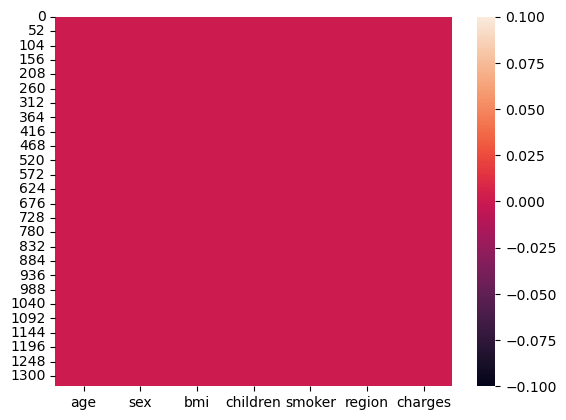

In [11]:
sns.heatmap(df.isnull())

### Separating Categorical data and Numerical Data

In [12]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i]== "object":
        categorical_col.append(i)
print ("Categorical Column: ", categorical_col)
print ("\n")

numerical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print ("Numerical Column: ", numerical_col)

Categorical Column:  ['sex', 'smoker', 'region']


Numerical Column:  ['age', 'bmi', 'children', 'charges']


In [13]:
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


### Data Analysis

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Age Value Distrbution 

C:\Users\gurpreet\AppData\Local\Temp\ipykernel_7004\201379171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


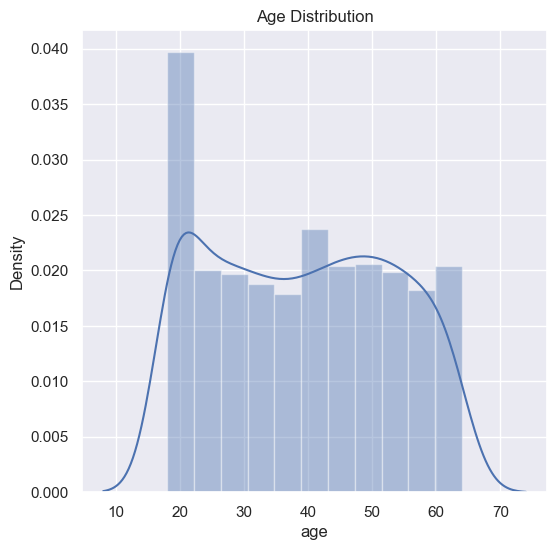

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

From the above graph we can observe that more number of age group people are between 20 to 23

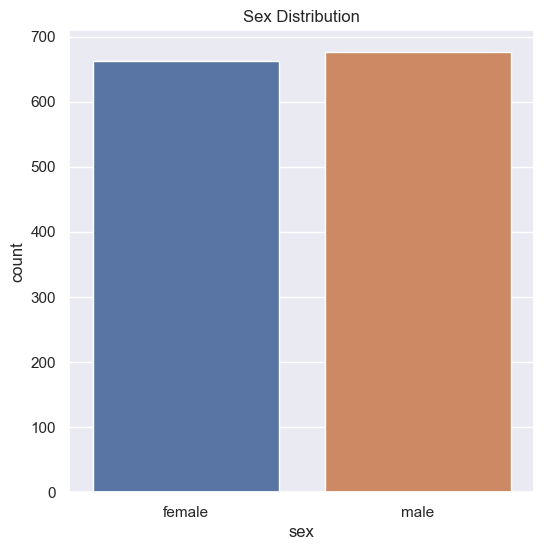

In [16]:
#Gender Column 
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [17]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

From the above plot we can observe that there is not much of difference betwwn male and female count.

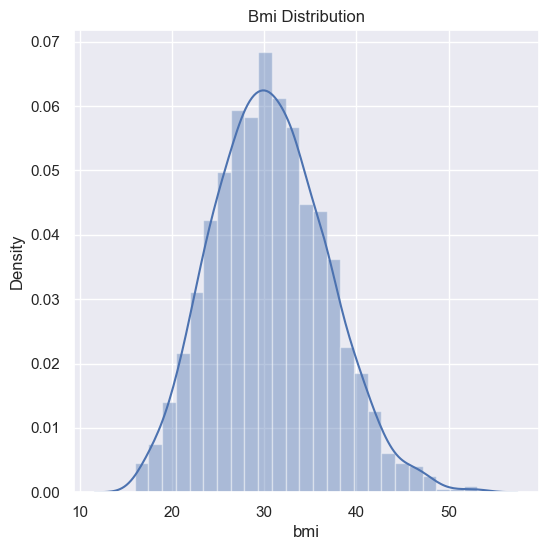

In [50]:
# BMI
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('Bmi Distribution')
plt.show()

From the above data we can see that it is a normal distribution data by the bell curve.

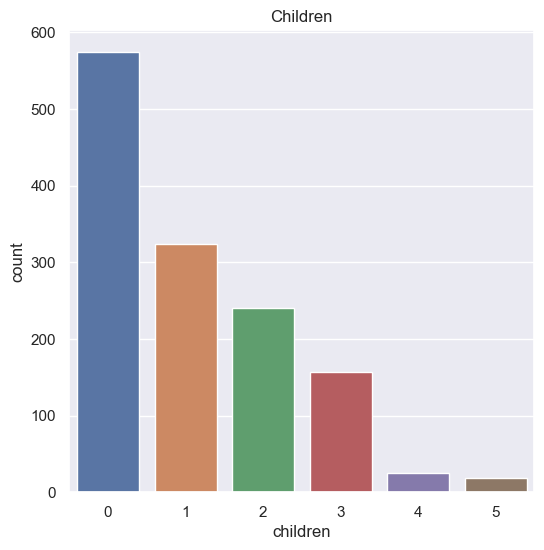

In [19]:
# Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [20]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

From the above data se we can observe that there are most number of people who dont have child i.e 574 people.

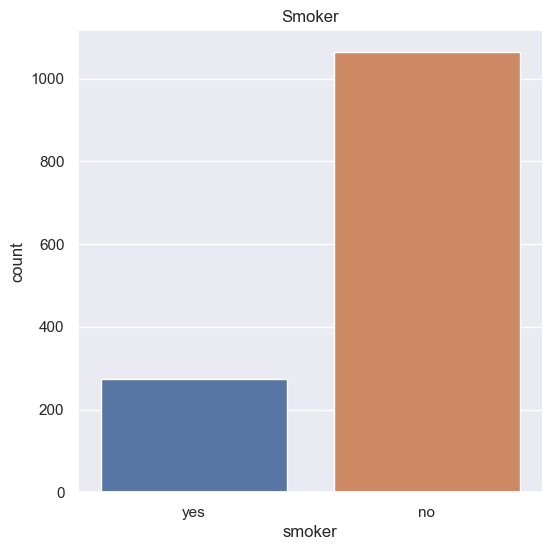

In [21]:
# Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

In [22]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

From the data we can observe that there are more number of non smokers than the number of smokers.

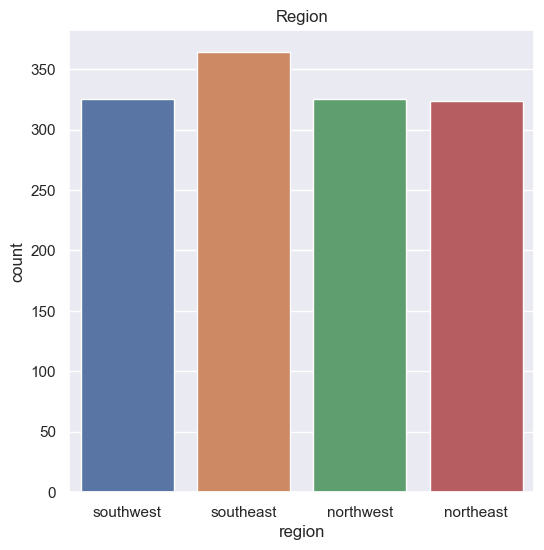

In [23]:
# Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

In [24]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Data is distributed almost same in all the regions except it is little high in southeast region

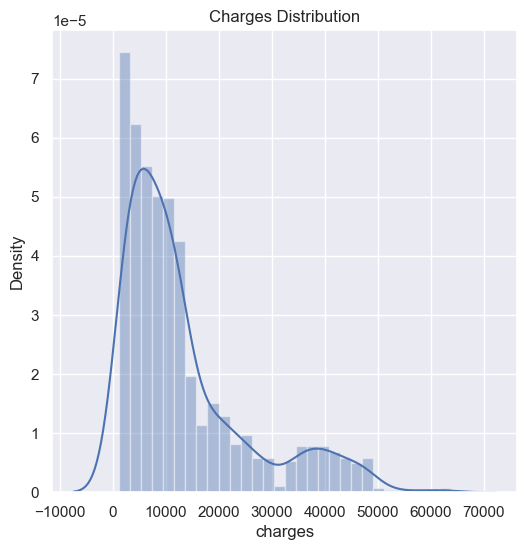

In [49]:
# Charges value distribution 
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

### Data Preprocesing 

In [26]:
#Encoding the categorical features
#Encoding sex column 
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

#Encoding Smoker column
df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

#Encoding Reging Column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2, 'northwest':3}},inplace=True)

### Spliting the features and the target

In [29]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [30]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [31]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Train, Test, split data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [34]:
X.shape, X_train.shape, X_test.shape

((1338, 6), (1070, 6), (268, 6))

### Model Training  

### Linear Regression 

In [35]:
# Loading the Linear Regression Model 
regressor = LinearRegression()

In [36]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [37]:
# Prediction on the training data
training_data_prediction = regressor.predict(X_train)

In [38]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.751505643411174


In [39]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [42]:
# R Square Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print ('R squared value : ', r2_test)

R squared value :  0.7447273869684077


### Building a prediction code

In [48]:
input_data = (60,1,36.005,0,1,2)

# Changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The Insurance Cost is USD', prediction[0])

[14869.35897203]
The Insurance Cost is USD 14869.358972029244
